Importing libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


from pprint import pprint


Importing the Dataset

In [2]:
# Loading the Dataset
df = pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Data Cleaning and Transformation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# Dropping useless columns
df.drop(columns=["id","Unnamed: 32"], inplace=True)
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [5]:
# Label Encoding
diagnosis_mapping = {"M": 1, "B":0}
df["diagnosis"] = df["diagnosis"].map(diagnosis_mapping)
df.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# Checking for duplicates
True in df.duplicated()

False

In [7]:
# Scaling Data
scaler = StandardScaler()

training_df = df.copy(deep=True)
training_df.drop("diagnosis", inplace=True, axis=1)
training_df_cols = training_df.columns

training_df = np.log1p(1+training_df)  # Add 1 to avoid issues with zero values
training_df = scaler.fit_transform(training_df)

training_df = pd.DataFrame(training_df, columns=training_df_cols)
training_df.insert(0, "diagnosis", df.diagnosis)

EDA

In [8]:
training_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.138192,-2.623994,1.282125,1.130423,1.565900,3.211960,2.608425,2.509382,2.202853,...,1.772922,-1.506145,2.024889,1.794864,1.306638,2.542157,2.053921,2.248391,2.713363,1.938696
1,1,1.721273,-0.272257,1.599219,1.713967,-0.827120,-0.484450,-0.005538,0.560543,0.007668,...,1.714603,-0.274620,1.503230,1.737591,-0.371797,-0.421661,-0.108705,1.091857,-0.235584,0.287131
2,1,1.530241,0.542362,1.510670,1.511895,0.943965,1.066286,1.380951,2.029614,0.944461,...,1.494900,0.086229,1.363120,1.493723,0.532351,1.123642,0.902567,1.926271,1.168062,0.206942
3,1,-0.775891,0.350752,-0.551259,-0.843606,3.256019,3.323661,1.913720,1.456771,2.835320,...,-0.186066,0.242161,-0.131546,-0.495125,3.346299,3.628337,1.948760,2.135151,5.712439,4.870574
4,1,1.661310,-1.229613,1.665134,1.668063,0.283866,0.555700,1.388287,1.433933,-0.003332,...,1.327763,-1.662584,1.356306,1.346233,0.226094,-0.296279,0.666586,0.741491,-0.880725,-0.396245


In [9]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [10]:
# Is there a null value
print(training_df.isnull().sum())

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


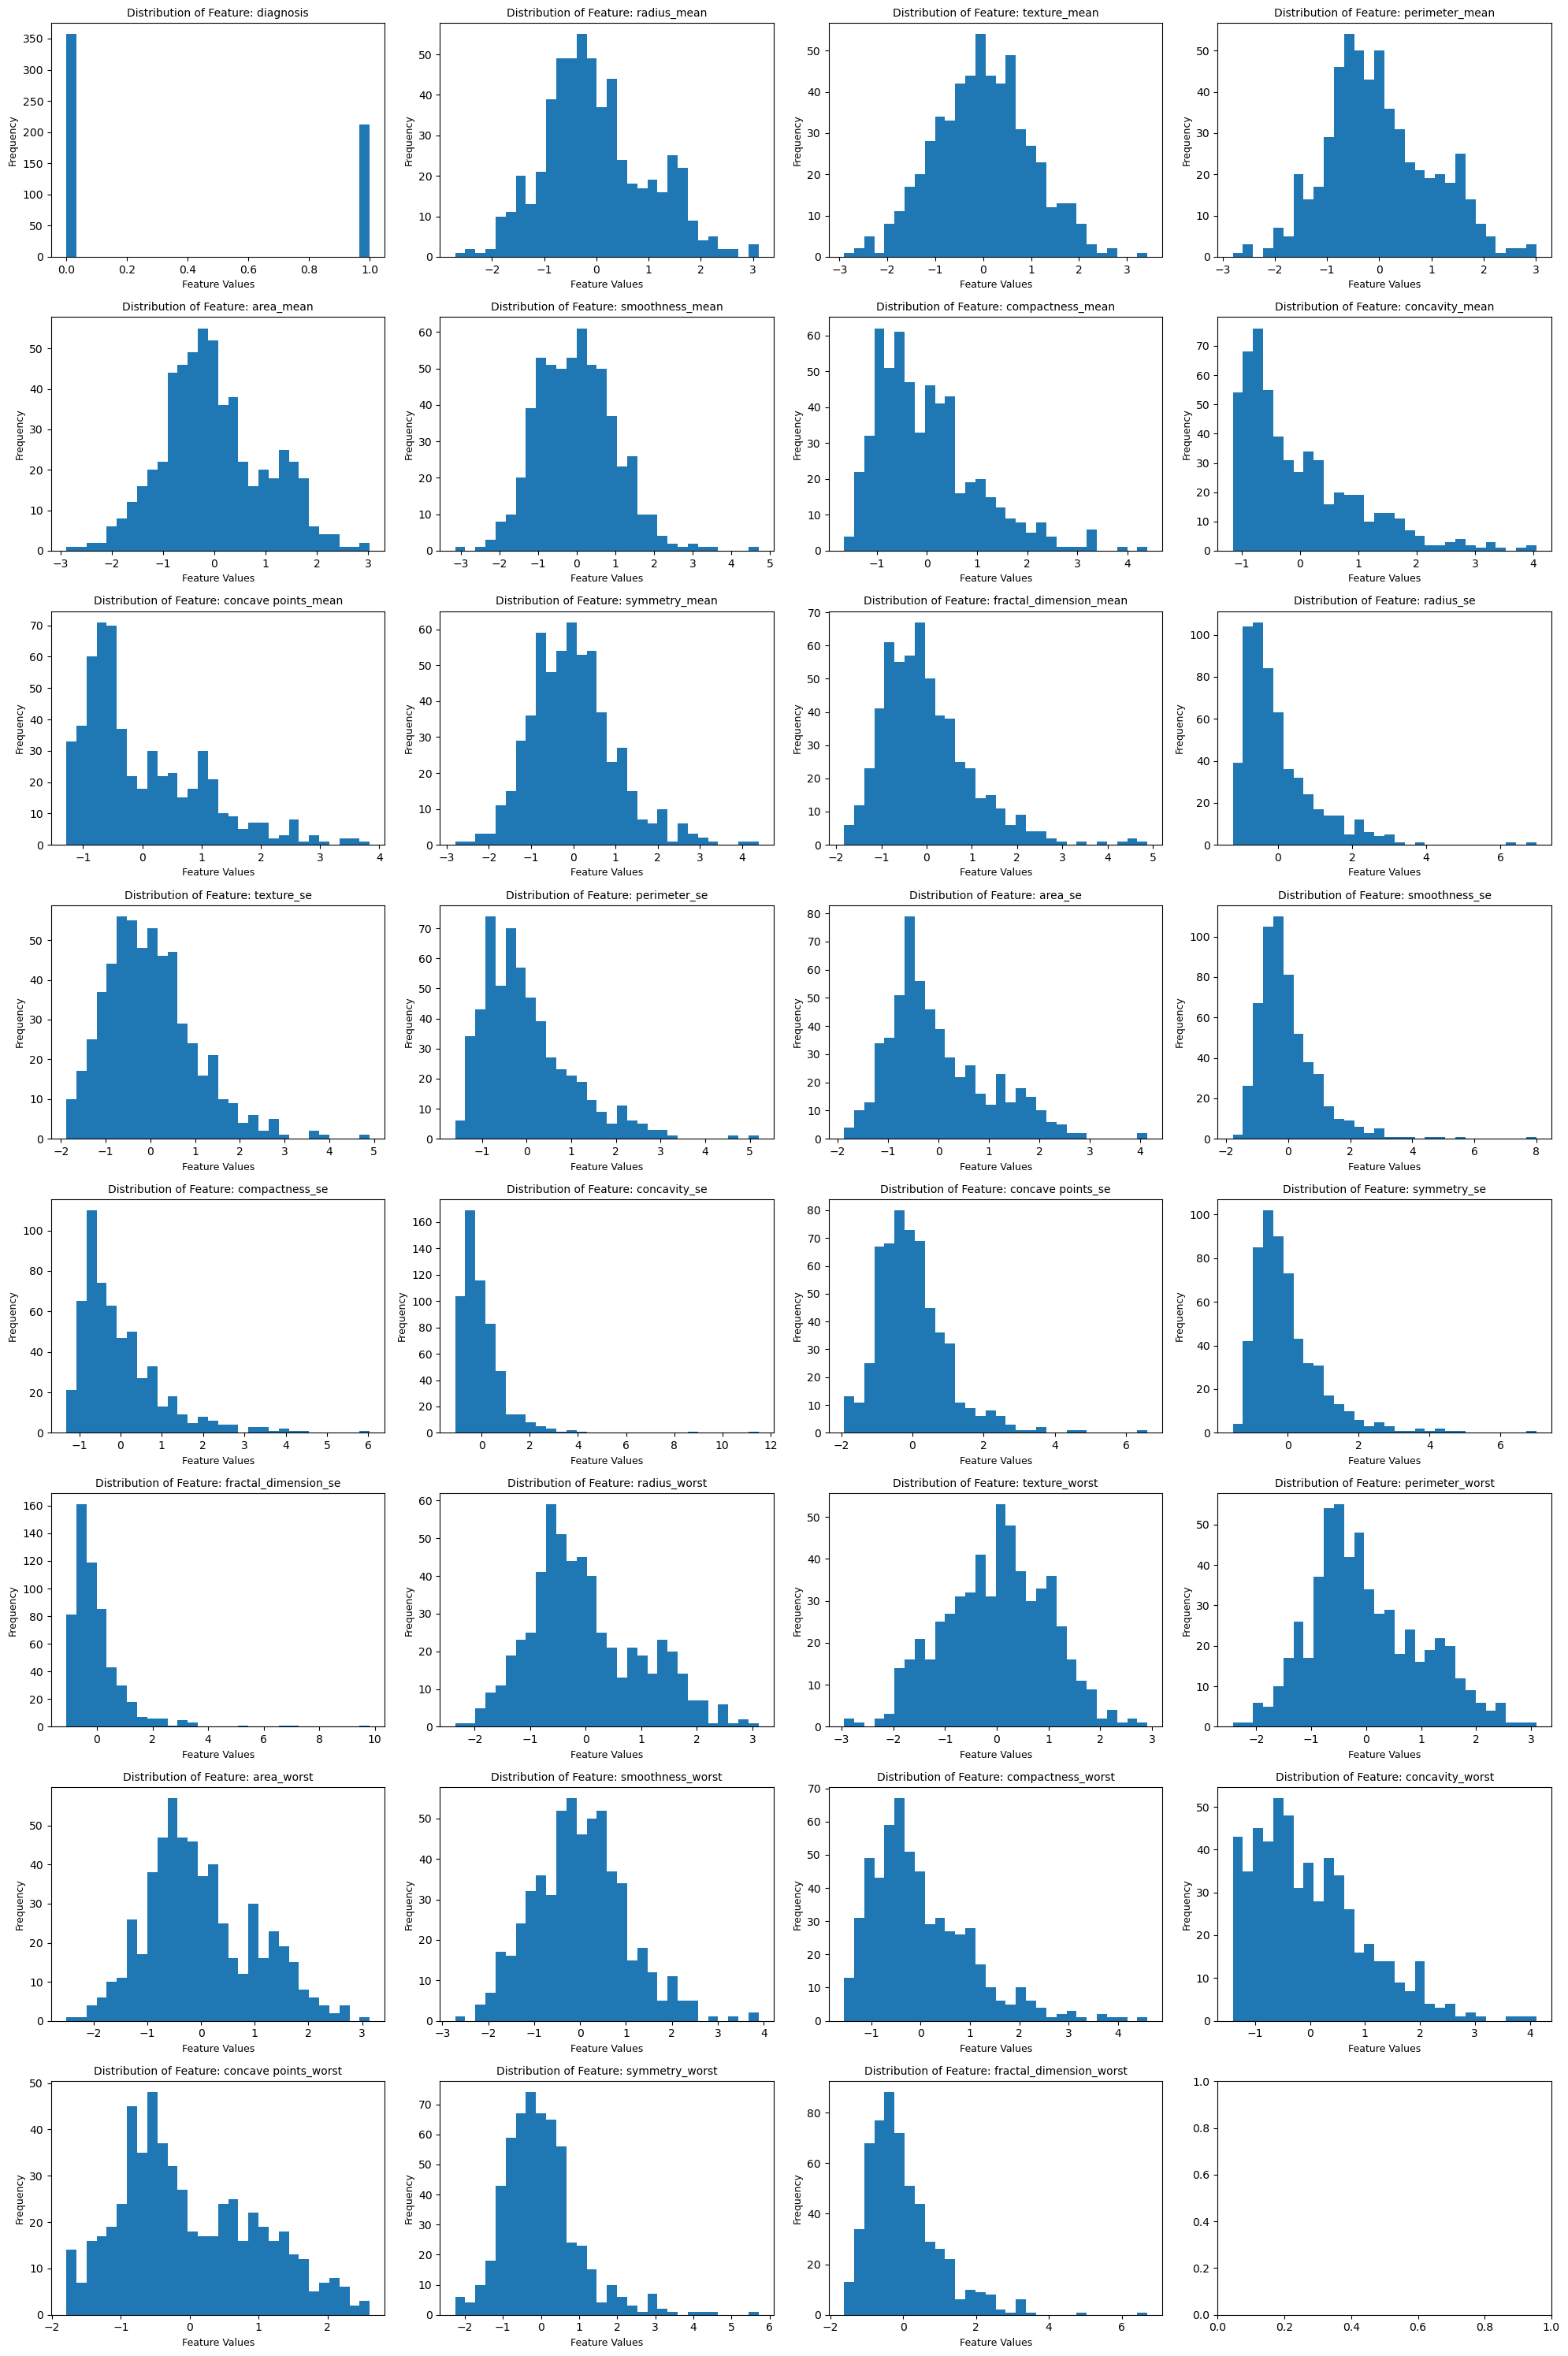

In [11]:
# Distribution Plot

fig, axes = plt.subplots(nrows=8, ncols=4, figsize=(20, 30))
axes = axes.flatten()

for i, column in enumerate(training_df.columns):
    ax = axes[i]
    ax.hist(training_df[column], bins=30)
    ax.set_title('Distribution of Feature: ' + column, fontsize=10)  # Increase title font size
    ax.set_xlabel('Feature Values', fontsize=9)  # Decrease x-axis label font size
    ax.set_ylabel('Frequency', fontsize=9)  # Decrease y-axis label font size

plt.tight_layout()
plt.show()

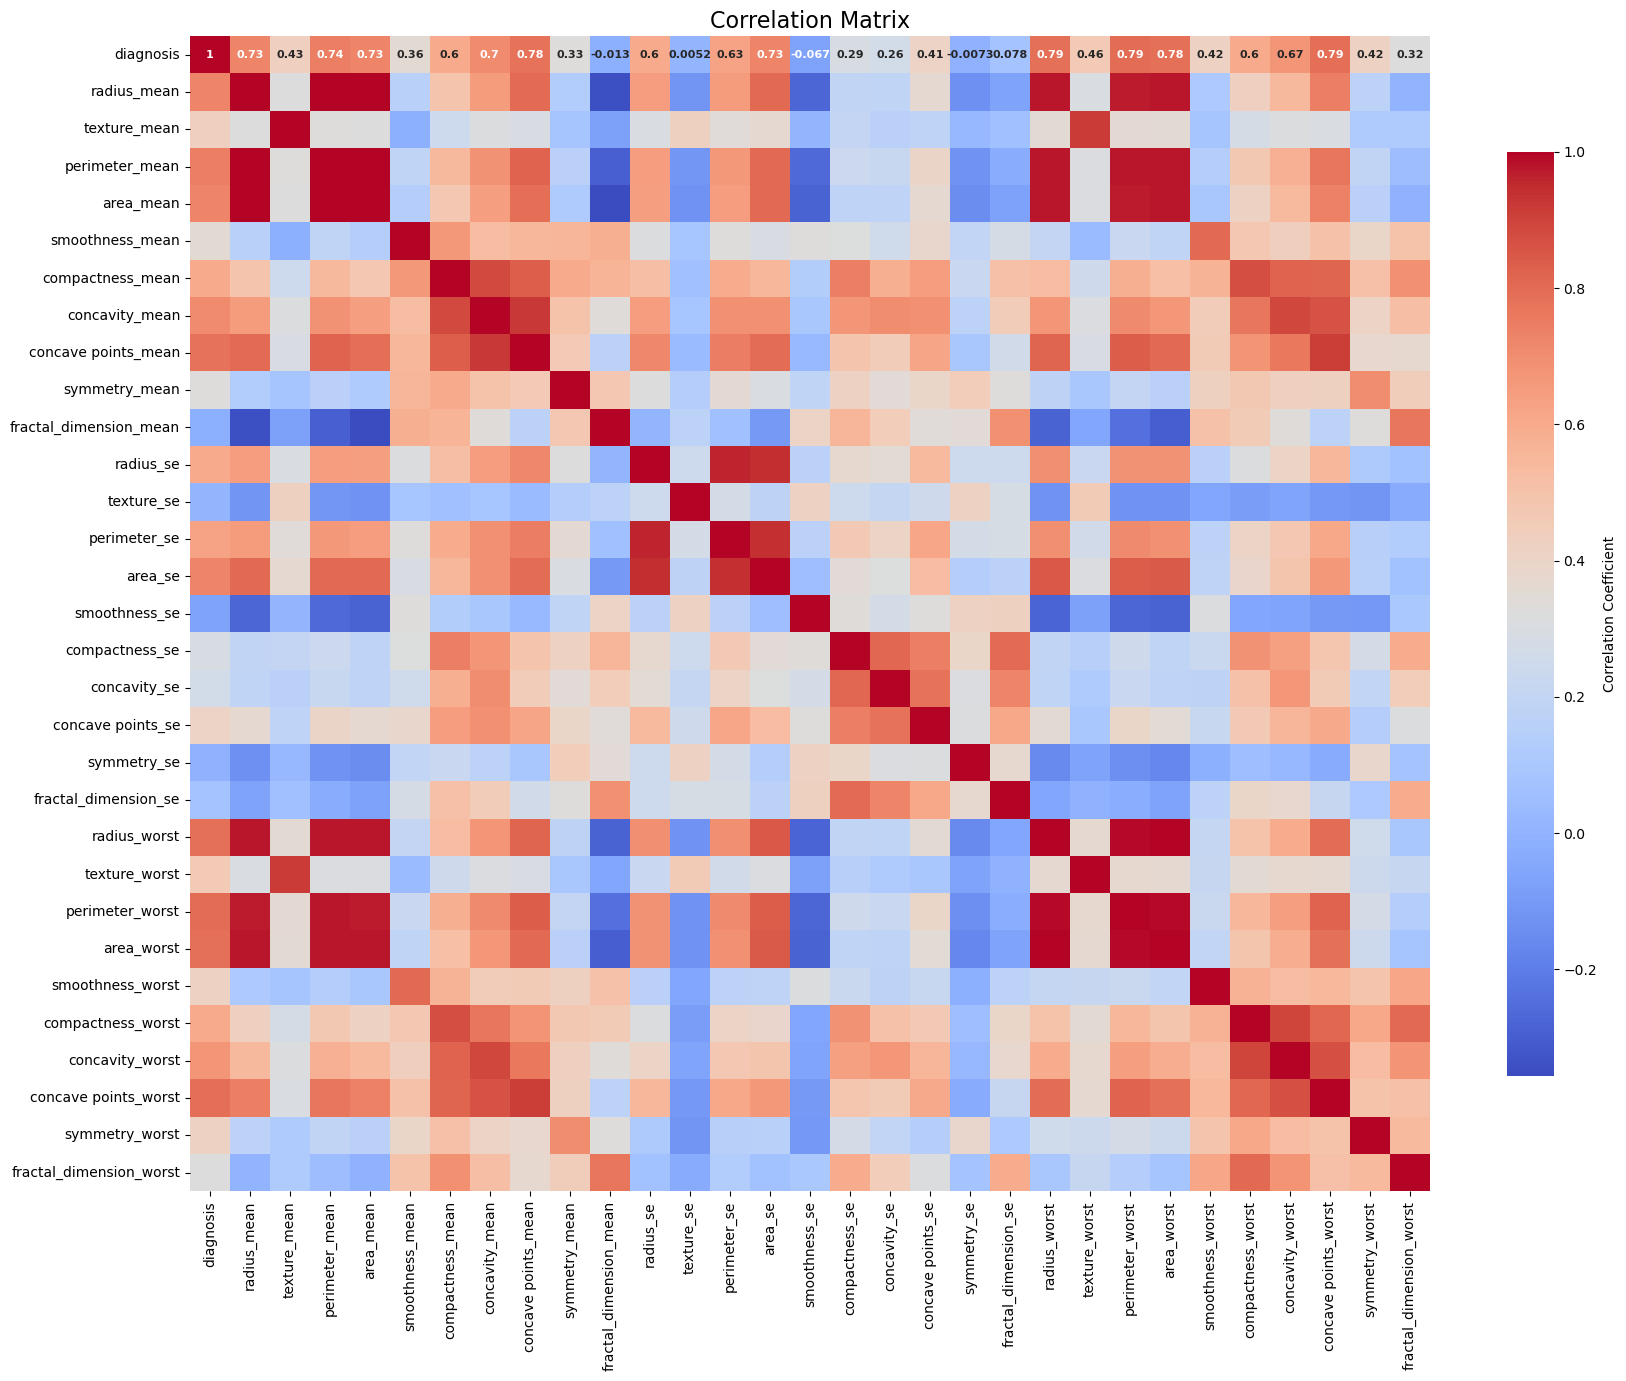

In [12]:
# Correlation Analysis
correlation_matrix = training_df.corr()
plt.figure(figsize=(20, 15))  

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',
            annot_kws={"size": 8, "weight": "bold"}, cbar_kws={"label": "Correlation Coefficient", "shrink": 0.8})

plt.title("Correlation Matrix", fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

c:\Users\mzham\miniconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mzham\miniconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mzham\miniconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mzham\miniconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

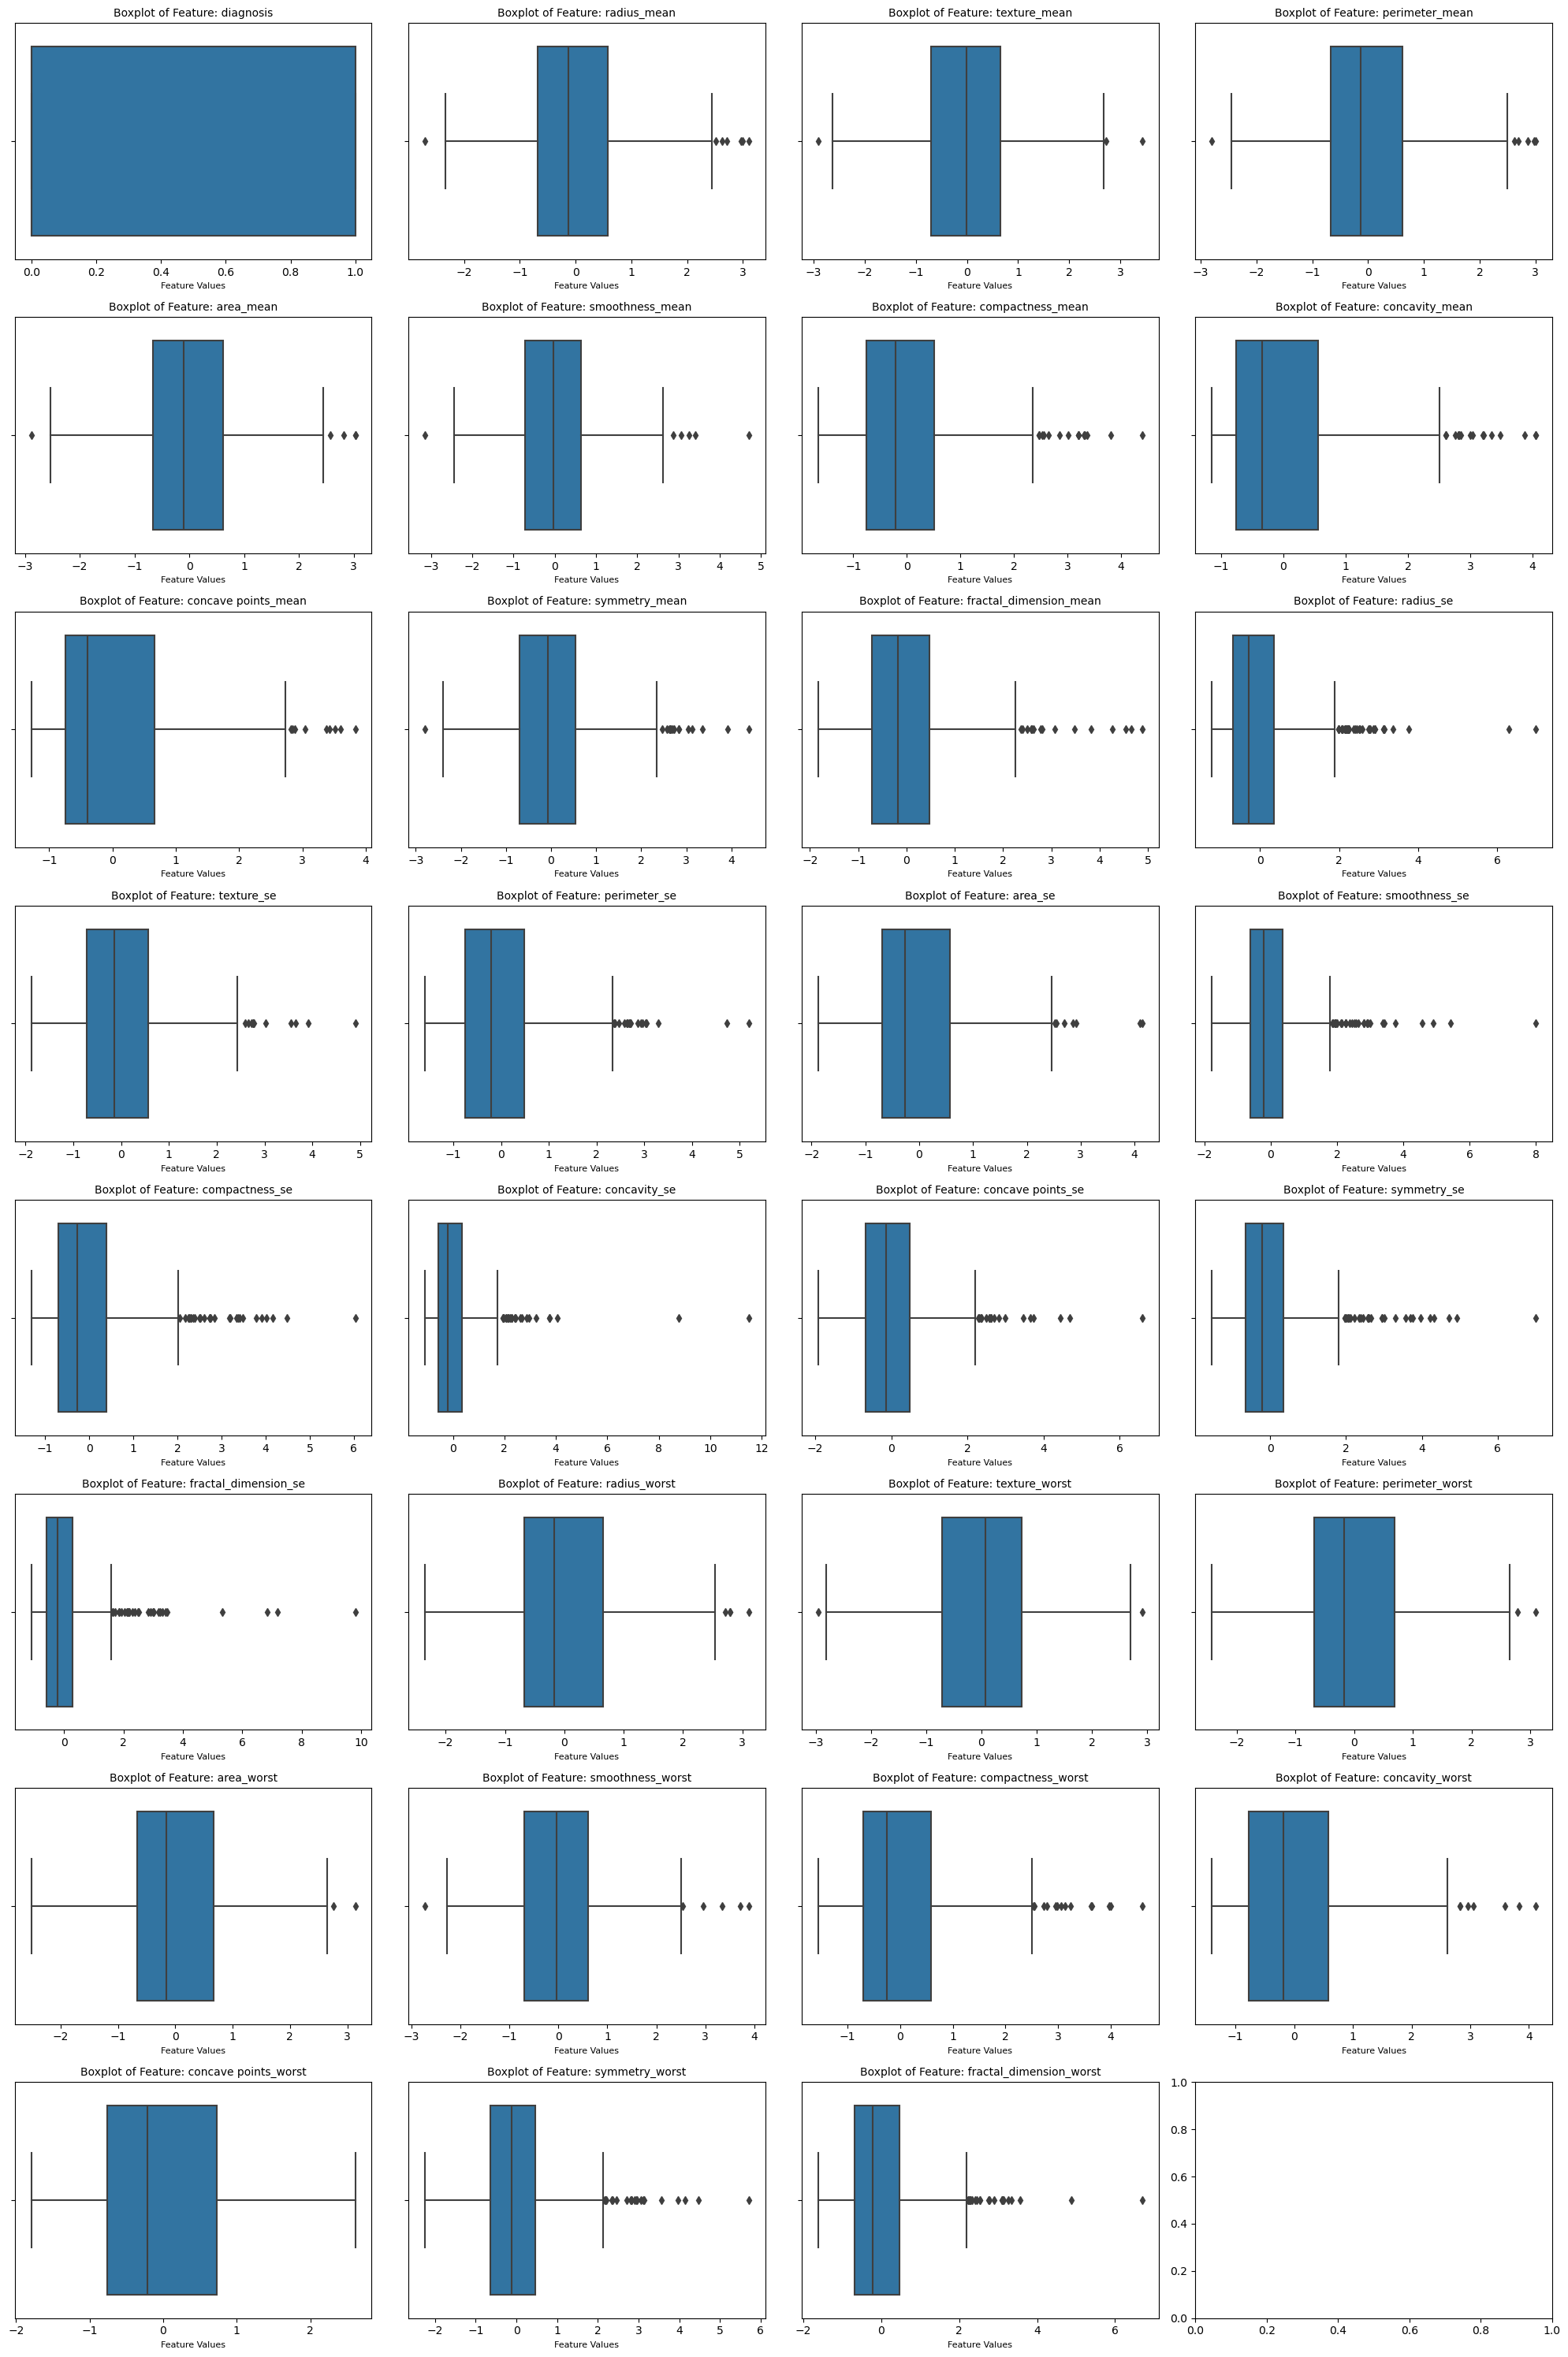

In [13]:
# Outliers Plot

fig, axes = plt.subplots(nrows=8, ncols=4, figsize=(20, 30))
axes = axes.flatten()

for i, column in enumerate(training_df.columns):
    ax = axes[i]
    sns.boxplot(x=training_df[column], ax=ax)
    ax.set_title('Boxplot of Feature: ' + column, fontsize=10)  # Increase title font size
    ax.set_xlabel('Feature Values', fontsize=8)  # Decrease x-axis label font size

plt.tight_layout()

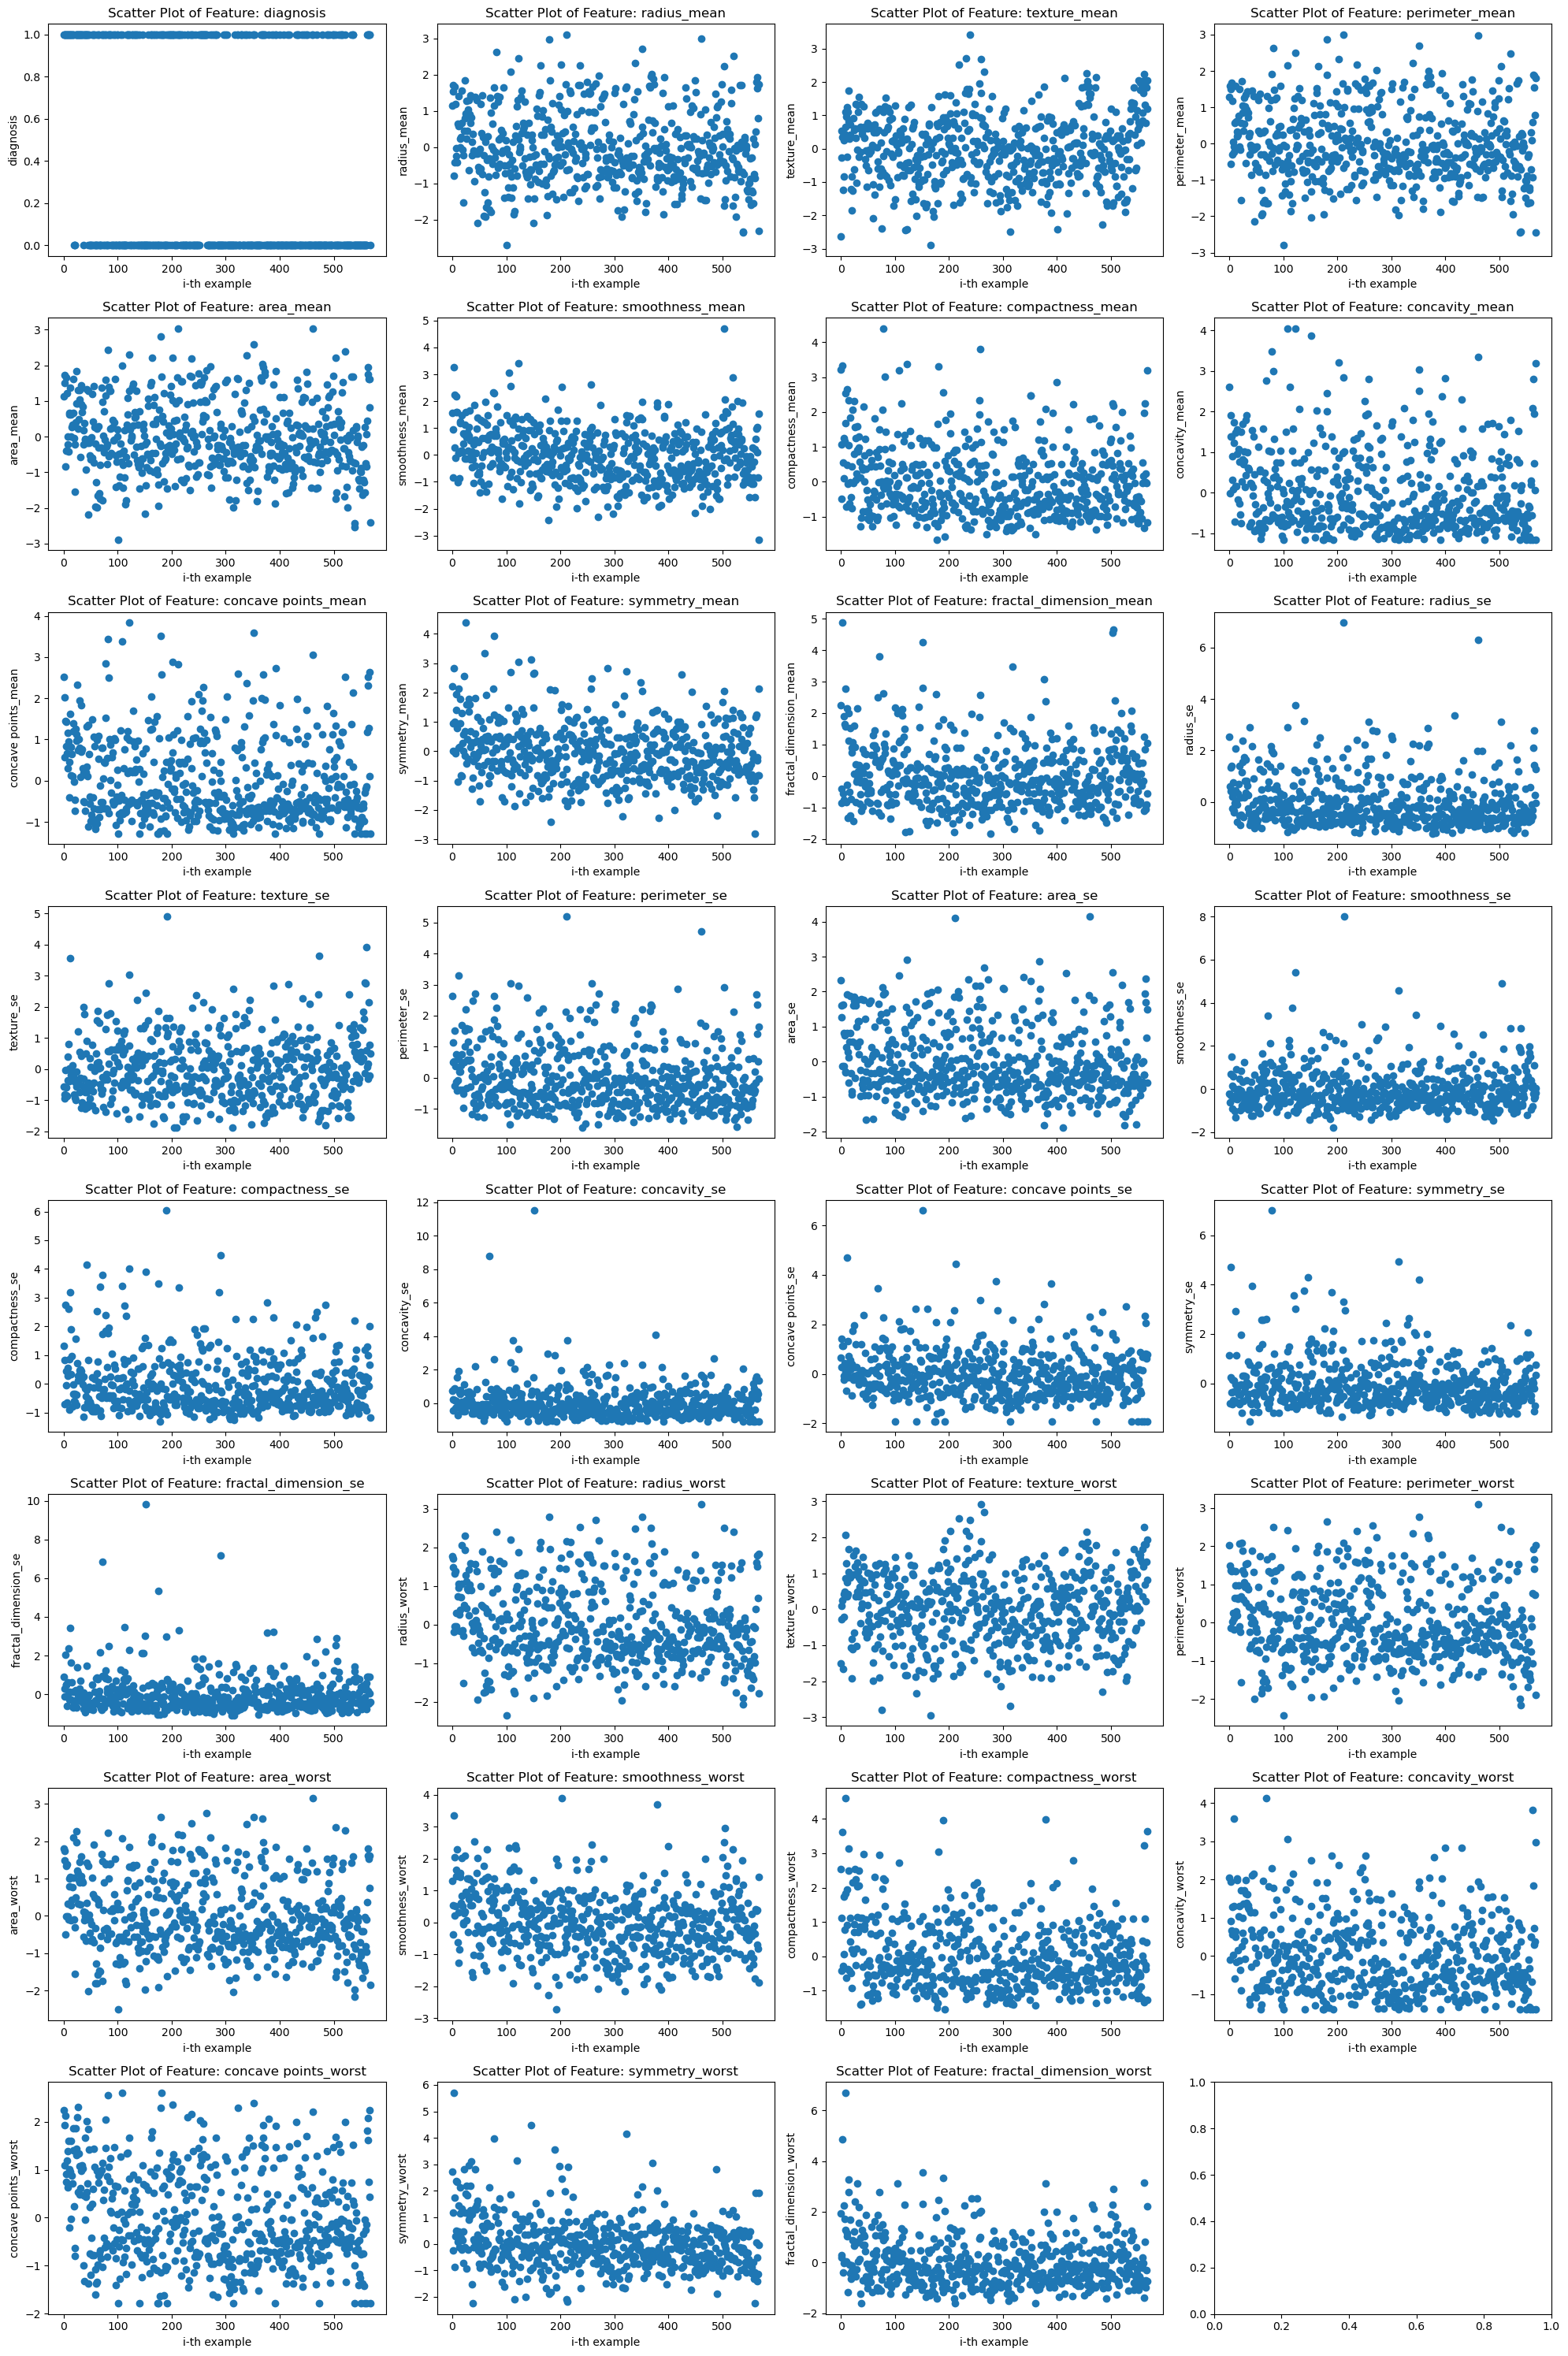

In [14]:
# Scatter Plot
fig, axes = plt.subplots(nrows=8, ncols=4, figsize=(20, 30))
axes = axes.flatten()

for i, column in enumerate(training_df.columns):
    ax = axes[i]
    ax.scatter(range(training_df.shape[0]), training_df[column], marker="o")
    ax.set_title('Scatter Plot of Feature: ' + column, fontsize=12)
    ax.set_xlabel('i-th example', fontsize=10)
    ax.set_ylabel(column, fontsize=10)

plt.tight_layout()
plt.show()

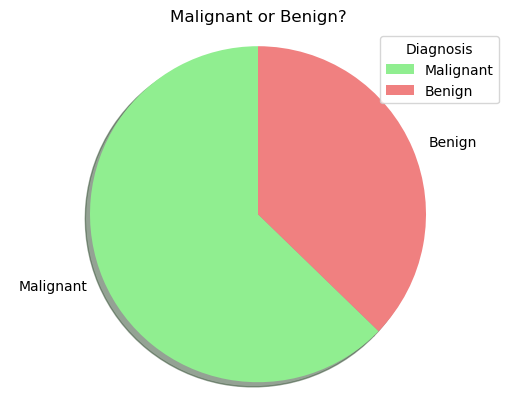

In [15]:
# Ratio of Malignant to Benign

value_counts = training_df['diagnosis'].value_counts()
labels = "Malignant", "Benign"
sizes = [value_counts[0], value_counts[1]]
colors = ['lightgreen', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, shadow=True, startangle=90)
plt.title("Malignant or Benign?")
plt.legend(title="Diagnosis")
plt.axis('equal')
plt.show()

Feature Engineering: PCA

In [16]:
# Preparing the Data
cols = list(training_df.columns)
cols.remove("diagnosis")
y = np.array(training_df["diagnosis"])
X = np.array(training_df[cols]).astype(float)

In [17]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.25, random_state=123)

In [18]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (426, 30)
X_test shape: (143, 30)
y_train shape: (426,)
y_test shape: (143,)


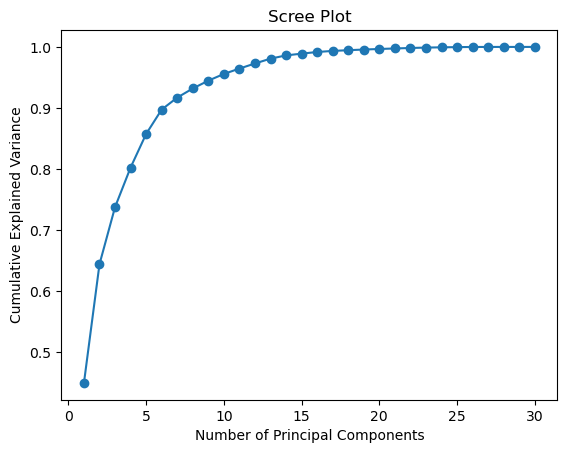

1 0.449,
2 0.644,
3 0.737,
4 0.802,
5 0.857,
6 0.897,
7 0.917,
8 0.932,
9 0.945,
10 0.956,
11 0.964,
12 0.973,
13 0.981,
14 0.986,
15 0.989,
16 0.992,
17 0.993,
18 0.995,
19 0.996,
20 0.997,
21 0.997,
22 0.998,
23 0.999,
24 0.999,
25 1.000,
26 1.000,
27 1.000,
28 1.000,
29 1.000,
30 1.000,


In [19]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the scree plot
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

for i, value in enumerate(cumulative_explained_variance):
    # Format the value with 2 decimal places
    formatted_value = "{:.3f}".format(value)
    
    # Display the formatted value
    print(f"{i + 1} {formatted_value},")

In [20]:
# Choose the number of components based on the scree plot or a desired threshold
n_components = 10  # Adjust as needed

pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

Models

In [21]:
# 1. Decision Trees
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Evaluate Decision Tree
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print("Decision Tree Accuracy:", accuracy_decision_tree)
print("Classification Report:")
print(classification_report(y_test, y_pred_decision_tree))

# 1.1. Decision Trees PCA
decision_tree_model.fit(X_train_pca, y_train)

y_pred_decision_tree_pca = decision_tree_model.predict(X_test_pca)

accuracy_decision_tree_pca = accuracy_score(y_test, y_pred_decision_tree_pca)
print("Decision Tree Accuracy (With PCA):", accuracy_decision_tree_pca)
print("Classification Report:")
print(classification_report(y_test, y_pred_decision_tree_pca))


Decision Tree Accuracy: 0.9790209790209791
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        89
           1       0.98      0.96      0.97        54

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

Decision Tree Accuracy (With PCA): 0.972027972027972
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        89
           1       0.96      0.96      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [22]:
# 2. Logistic Regression
logistic_regression_model = LogisticRegression(random_state=42)
logistic_regression_model.fit(X_train, y_train)

y_pred_logistic_regression = logistic_regression_model.predict(X_test)

accuracy_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression)
print("Logistic Regression Accuracy:", accuracy_logistic_regression)
print("Classification Report:")
print(classification_report(y_test, y_pred_logistic_regression))

# 2.1. Logistic Regression with PCA
logistic_regression_model.fit(X_train_pca, y_train)

y_pred_logistic_regression_pca = logistic_regression_model.predict(X_test_pca)

accuracy_logistic_regression_pca = accuracy_score(y_test, y_pred_logistic_regression_pca)
print("Logistic Regression Accuracy with PCA:", accuracy_logistic_regression_pca)
print("Classification Report:")
print(classification_report(y_test, y_pred_logistic_regression_pca))

Logistic Regression Accuracy: 0.986013986013986
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        89
           1       1.00      0.96      0.98        54

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.99       143
weighted avg       0.99      0.99      0.99       143

Logistic Regression Accuracy with PCA: 0.993006993006993
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        89
           1       1.00      0.98      0.99        54

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [23]:
# 3. Random Forest Classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

y_pred_random_forest = random_forest_model.predict(X_test)

accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
print("Random Forest Accuracy:", accuracy_random_forest)
print("Classification Report:")
print(classification_report(y_test, y_pred_random_forest))

# 3.1. Random Forest Classifier with PCA
random_forest_model_pca = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model_pca.fit(X_train_pca, y_train)
y_pred_random_forest_pca = random_forest_model_pca.predict(X_test_pca)

accuracy_random_forest_pca = accuracy_score(y_test, y_pred_random_forest_pca)
print("Random Forest Accuracy with PCA:", accuracy_random_forest_pca)
print("Classification Report:")
print(classification_report(y_test, y_pred_random_forest_pca))

Random Forest Accuracy: 0.993006993006993
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        89
           1       1.00      0.98      0.99        54

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

Random Forest Accuracy with PCA: 0.972027972027972
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        89
           1       0.98      0.94      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [24]:
# 4. KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

# 3.1 KNN with PCA
knn_model = KNeighborsClassifier(n_neighbors=5)  
knn_model.fit(X_train_pca, y_train)

y_pred_knn_pca = knn_model.predict(X_test_pca)

accuracy_knn_pca = accuracy_score(y_test, y_pred_knn_pca)
print("KNN Accuracy with PCA:", accuracy_knn_pca)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn_pca))

KNN Accuracy: 0.986013986013986
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        89
           1       0.98      0.98      0.98        54

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

KNN Accuracy with PCA: 0.972027972027972
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        89
           1       0.96      0.96      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [25]:
# 5. ANN
layer1, layer2, layer3, layer4 = 256, 128, 64, 32

tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [
        ### START CODE HERE ###
        Dense(units=128, activation="relu"),
        Dense(units=64, activation="relu"),
        Dense(1, activation='sigmoid')
        ### END CODE HERE ###
    ], name = "my_model"
)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train.reshape(-1,1), epochs=100, batch_size=32)

predictions = model.predict(np.array(X_test))
threshold = 0.5
binary_predictions = (predictions >= threshold).astype(int)


Epoch 1/100
14/14 [==============================] - 4s 7ms/step - loss: 0.3815 - accuracy: 0.9014
Epoch 2/100
14/14 [==============================] - 0s 9ms/step - loss: 0.1666 - accuracy: 0.9531
Epoch 3/100
14/14 [==============================] - 0s 11ms/step - loss: 0.1085 - accuracy: 0.9624
Epoch 4/100
14/14 [==============================] - 0s 8ms/step - loss: 0.0862 - accuracy: 0.9695
Epoch 5/100
14/14 [==============================] - 0s 9ms/step - loss: 0.0737 - accuracy: 0.9789
Epoch 6/100
14/14 [==============================] - 0s 9ms/step - loss: 0.0647 - accuracy: 0.9812
Epoch 7/100
14/14 [==============================] - 0s 10ms/step - loss: 0.0572 - accuracy: 0.9812
Epoch 8/100
14/14 [==============================] - 0s 9ms/step - loss: 0.0529 - accuracy: 0.9836
Epoch 9/100
14/14 [==============================] - 0s 9ms/step - loss: 0.0479 - accuracy: 0.9789
Epoch 10/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0422 - accuracy: 0.9883
Epoch 1

In [26]:
# ANN_PCA
layer1, layer2, layer3, layer4 = 256, 128, 64, 32

tf.random.set_seed(1234) # for consistent results
model_pca = Sequential(
    [
        ### START CODE HERE ###
        Dense(units=128, activation="relu"),
        Dense(units=64, activation="relu"),
        Dense(1, activation='sigmoid')
        ### END CODE HERE ###
    ], name = "my_model"
)
model_pca.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_pca.fit(X_train_pca, y_train.reshape(-1,1), epochs=100, batch_size=32)

predictions_pca = model_pca.predict(np.array(X_test_pca))
threshold = 0.5
binary_predictions_pca = (predictions_pca >= threshold).astype(int)

Epoch 1/100
14/14 [==============================] - 1s 5ms/step - loss: 0.3962 - accuracy: 0.8967
Epoch 2/100
14/14 [==============================] - 0s 5ms/step - loss: 0.1848 - accuracy: 0.9577
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 0.1183 - accuracy: 0.9648
Epoch 4/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0918 - accuracy: 0.9671
Epoch 5/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0773 - accuracy: 0.9789
Epoch 6/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0676 - accuracy: 0.9812
Epoch 7/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0608 - accuracy: 0.9812
Epoch 8/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0562 - accuracy: 0.9836
Epoch 9/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0515 - accuracy: 0.9812
Epoch 10/100
14/14 [==============================] - 0s 6ms/step - loss: 0.0465 - accuracy: 0.9812
Epoch 11/

In [27]:

ANN_accuracy = accuracy_score(y_test, binary_predictions)
print("ANN Accuracy:", ANN_accuracy)
print("ANN Classification Report")
print(classification_report(y_test, binary_predictions))

ANN Accuracy: 0.986013986013986
ANN Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        89
           1       1.00      0.96      0.98        54

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.99       143
weighted avg       0.99      0.99      0.99       143



In [28]:
ANN_accuracy_pca = accuracy_score(y_test, binary_predictions_pca)
print("ANN_PCA Accuracy:", ANN_accuracy_pca)
print("ANN Classification Report: PCA")
print(classification_report(y_test, binary_predictions_pca))

ANN_PCA Accuracy: 0.972027972027972
ANN Classification Report: PCA
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        89
           1       0.96      0.96      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



Selected Model: Random Forest

MODEL EVALUATION

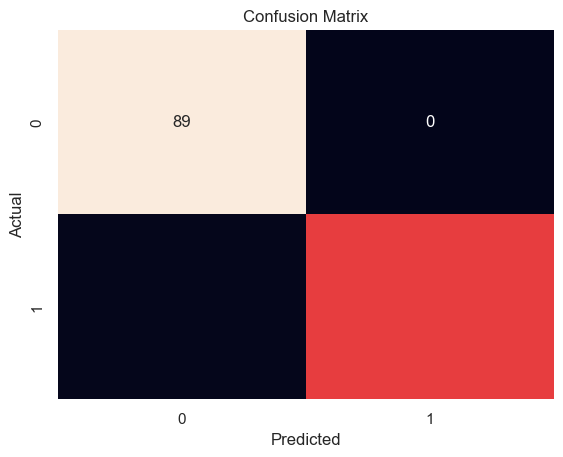

In [29]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_random_forest)
sns.set(font_scale=1)

sns.heatmap(cm, annot=True, fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

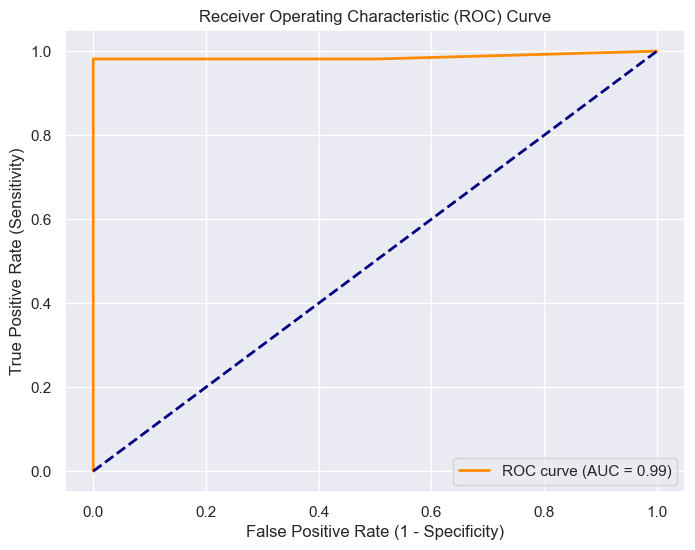

In [30]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, random_forest_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


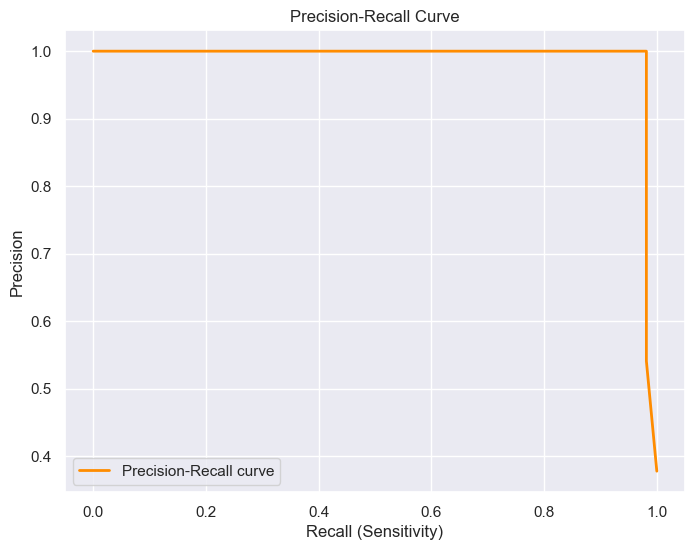

In [31]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, random_forest_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

Model Refinement 

In [33]:
# Defining the grid search parameters for each model

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['log2', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['log2', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [34]:
# Use the random grid to search for best hyperparameters

# First, the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [35]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 50,
 'bootstrap': False}

In [36]:
# 3. Random Forest Classifier
base_model = RandomForestClassifier(n_estimators=100, random_state=42)
base_model.fit(X_train, y_train)

base_model_pred = random_forest_model.predict(X_test)
accuracy_random_forest = accuracy_score(y_test, base_model_pred)
print("Random Forest Accuracy:", accuracy_random_forest)
print("Classification Report:")
print(classification_report(y_test, base_model_pred))
pprint(base_model.get_params())


best_model_pred = rf_random.best_estimator_.predict(X_test)
accuracy_random_forest = accuracy_score(y_test, best_model_pred)
print("Random Forest Accuracy:", accuracy_random_forest)
print("Classification Report:")
print(classification_report(y_test, best_model_pred))
pprint(rf_random.best_params_)

# print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Random Forest Accuracy: 0.993006993006993
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        89
           1       1.00      0.98      0.99        54

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}
Random Forest Accuracy: 0.993006993006993
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        89
           1       1.00   

In [37]:
# GridSearch
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [131]:
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [133]:
grid_search.best_params_


{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [134]:

best_grid = grid_search.best_estimator_

best_grid_pred = best_grid.predict(X_test)
best_grid_accuracy = accuracy_score(y_test, best_grid_pred)
print("Random Forest Accuracy:", best_grid_accuracy)
print("Classification Report:")
print(classification_report(y_test, best_grid_pred))
pprint(grid_search.best_params_)

Random Forest Accuracy: 0.993006993006993
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        89
           1       1.00      0.98      0.99        54

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}


Feature Importance

In [141]:
# Feature Importance
rf_exp = best_grid
importances = list(rf_exp.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(training_df_cols, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20}\tImportance: {}'.format(*pair)) for pair in feature_importances]
rf_exp.n_features_in_

Variable: concave points_mean 	Importance: 0.14
Variable: perimeter_worst     	Importance: 0.1
Variable: area_worst          	Importance: 0.1
Variable: radius_worst        	Importance: 0.09
Variable: concave points_worst	Importance: 0.08
Variable: radius_mean         	Importance: 0.07
Variable: area_mean           	Importance: 0.06
Variable: area_se             	Importance: 0.06
Variable: concavity_mean      	Importance: 0.05
Variable: perimeter_mean      	Importance: 0.04
Variable: concavity_worst     	Importance: 0.04
Variable: compactness_worst   	Importance: 0.03
Variable: compactness_mean    	Importance: 0.02
Variable: texture_worst       	Importance: 0.02
Variable: texture_mean        	Importance: 0.01
Variable: smoothness_mean     	Importance: 0.01
Variable: radius_se           	Importance: 0.01
Variable: perimeter_se        	Importance: 0.01
Variable: compactness_se      	Importance: 0.01
Variable: concavity_se        	Importance: 0.01
Variable: smoothness_worst    	Importance:

30

Text(0.5, 1.0, 'Variable Importances')

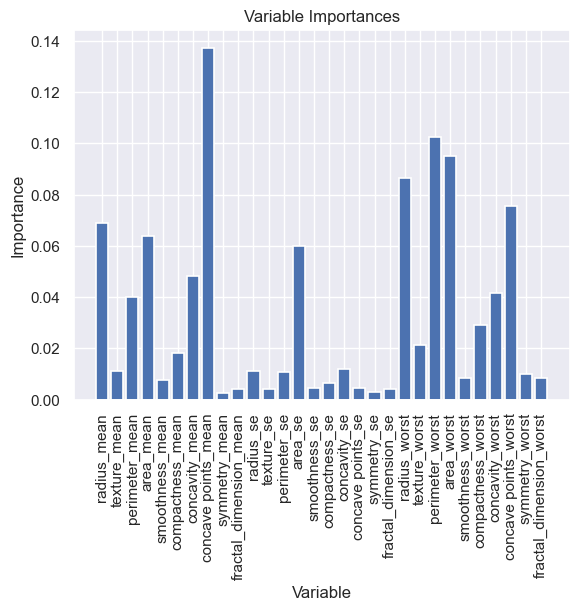

In [142]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, training_df_cols, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances')

Text(0.5, 1.0, 'Cumulative Importance: 90.0%')

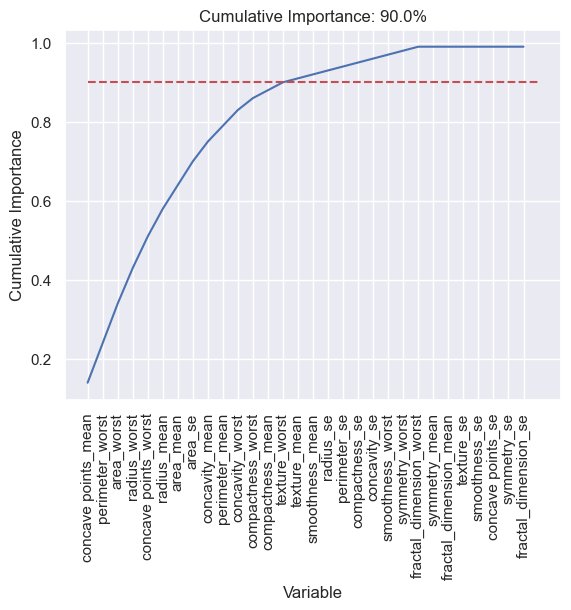

In [147]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances)

percentage_of_importance = .90
# Draw line at [percentage_of_importance]% of importance retained
plt.hlines(y = percentage_of_importance, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel("Cumulative Importance"); plt.title(f'Cumulative Importance: {percentage_of_importance*100}%')

In [148]:
# Find number of features for cumulative importance of [percentage_of_importance]%
# Add 1 because Python is zero-indexed

num_features_for_percentage_of_importance = np.where(cumulative_importances > percentage_of_importance)[0][0] + 1
print(f'Number of features for {percentage_of_importance*100}% importance:', num_features_for_percentage_of_importance)

Number of features for 90.0% importance: 14


In [149]:
# Extract the names of the most important features
important_feature_names = [feature[0] for feature in feature_importances[0:num_features_for_percentage_of_importance]]
# Find the columns of the most important features
important_indices = [list(training_df_cols).index(feature) for feature in important_feature_names]
# Create training and testing sets with only the important features
important_train_features = X_train[:, important_indices]
important_test_features = X_test[:, important_indices]
# Sanity check on operations
print('Important train features shape:', important_train_features.shape)
print('Important test features shape:', important_test_features.shape)

Important train features shape: (426, 14)
Important test features shape: (143, 14)


In [150]:
# Train the expanded model on only the important features
rf_exp_important = rf_exp
rf_exp_important.fit(important_train_features, y_train)
# Make predictions on test data
predictions = rf_exp_important.predict(important_test_features)
# Performance metrics
errors = abs(predictions - y_test)
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')

print(f"Random Forest Accuracy with {num_features_for_percentage_of_importance} features:",accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Average absolute error: 0.01 degrees.
Random Forest Accuracy with 14 features: 0.993006993006993
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        89
           1       1.00      0.98      0.99        54

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



Comparing Performance

In [153]:

import timeit
timeit.timeit()

def func1():
    rf_exp.fit(X_train, y_train)

def func2():
    rf_exp_important.fit(important_train_features, y_train)

execution_time_all=0
execution_time_important=0
n_iter = 100
for i in range(n_iter):
    execution_time_all += timeit.timeit(func1, number=1)
    execution_time_important += timeit.timeit(func2, number=1)
execution_time_all /= n_iter
execution_time_important /= n_iter
print(f"Average Execution time with all of the features: {execution_time_all} seconds")
print(f"Average Execution time with {num_features_for_percentage_of_importance} important features: {execution_time_important} seconds")
print(f"Performance Gain: {execution_time_all/execution_time_important}%")

Average Execution time with all of the features: 0.1912687879999612 seconds
Average Execution time with 14 important features: 0.18599525699997685 seconds
Performance Gain: 1.0283530402067458%
